In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# loading data

In [48]:
data=pd.read_csv('diamonds2.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# check on data

In [49]:
data.shape

(53947, 11)

In [50]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           3
color         1
clarity       0
depth         1
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [51]:
data['cut'].fillna(data['cut'].mode()[0],inplace=True)
data['color'].fillna(data['color'].mode()[0],inplace=True)

C:\Users\Yassmin\AppData\Local\Temp\ipykernel_36788\1252889795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cut'].fillna(data['cut'].mode()[0],inplace=True)
C:\Users\Yassmin\AppData\Local\Temp\ipykernel_36788\1252889795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [52]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         1
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [53]:
data['depth'].fillna(data['depth'].mean(),inplace=True)

C:\Users\Yassmin\AppData\Local\Temp\ipykernel_36788\1579916010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['depth'].fillna(data['depth'].mean(),inplace=True)


In [54]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [55]:
data.drop(columns='Unnamed: 0',inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53942,0.80,Ideal,E,SI2,60.8,56.0,2939,6.02,6.01,3.66
53943,0.73,Ideal,F,VS2,62.7,58.0,2939,5.72,5.77,3.6
53944,0.72,Ideal,E,SI2,62.4,57.0,2939,5.71,5.74,3.57
53945,0.75,Ideal,G,VS2,60.6,55.0,2939,5.93,5.91,3.59


In [56]:
duplicated=data.duplicated()
duplicated.sum()

np.int64(153)

In [57]:
data.drop_duplicates(inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.5
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [58]:
data['price']=data['price'].apply(lambda x:abs(x) if x<0 else x)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 4.5+ MB


# visualizations


<Axes: xlabel='cut', ylabel='Count'>

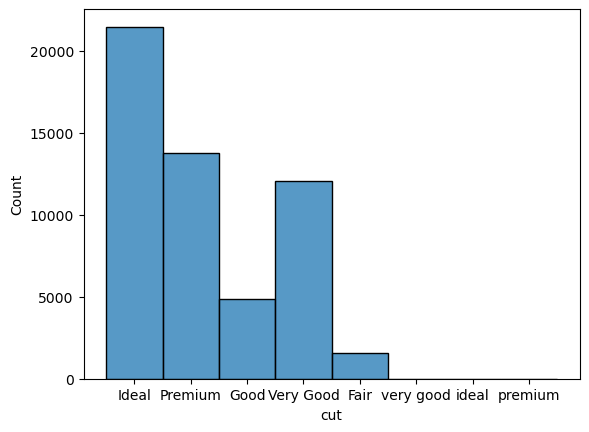

In [60]:
sns.histplot(x='cut',data=data) #1d

ideal has larger number

In [61]:
data['cut']=data['cut'].replace('ideal' , 'Ideal')
data['cut']=data['cut'].replace('very good' , 'Very Good')
data['cut']=data['cut'].replace('premium' , 'Premium')

<Axes: xlabel='cut', ylabel='Count'>

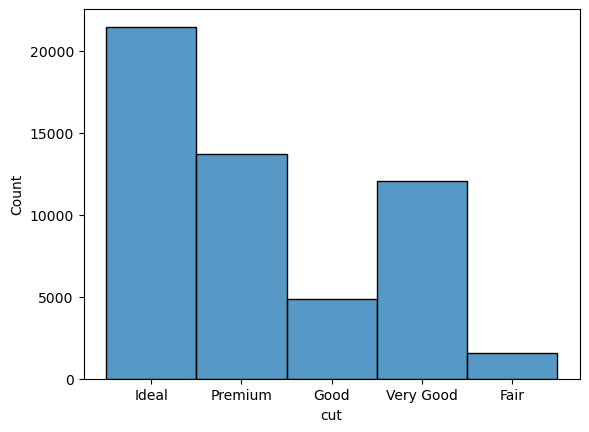

In [62]:
sns.histplot(x='cut',data=data) #1d

<Axes: xlabel='cut', ylabel='Count'>

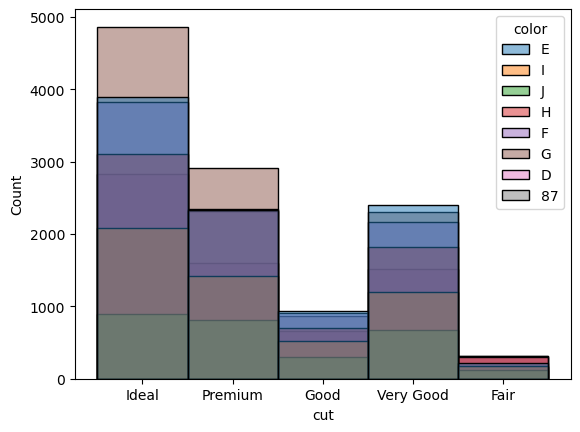

In [63]:
sns.histplot(x='cut',hue='color',data=data) #1d

In [64]:
data['color']=data['color'].replace("87" , 'B')

<Axes: xlabel='cut', ylabel='Count'>

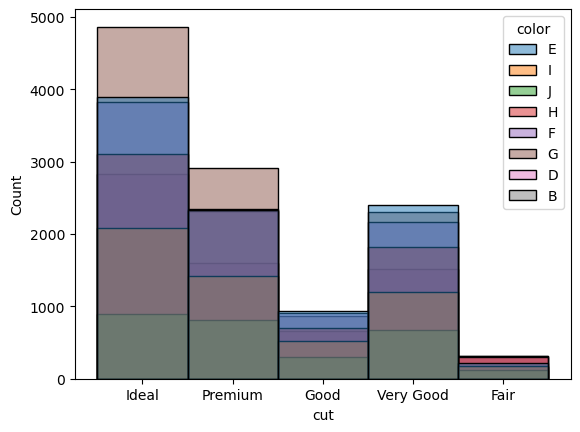

In [65]:
sns.histplot(x='cut',hue='color',data=data) #1d

<Axes: xlabel='cut', ylabel='color'>

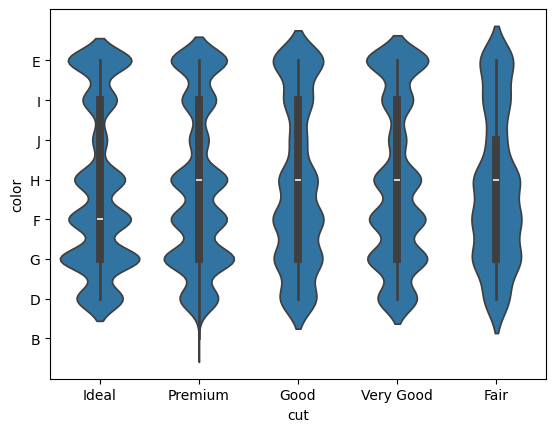

In [80]:
sns.violinplot(x='cut',y='color',data=data) #1d

premuim does't have B color

<Axes: xlabel='cut'>

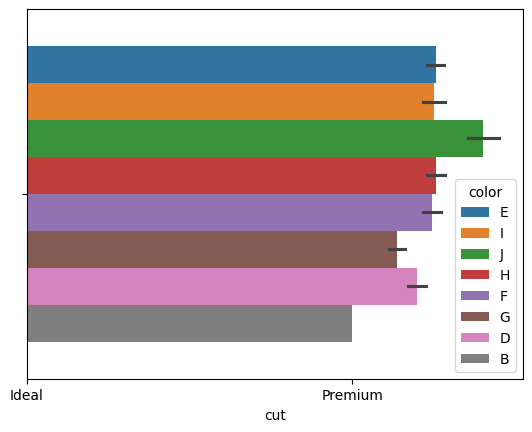

In [66]:
sns.barplot(x='cut',hue='color',data=data) #1d

<Axes: xlabel='clarity', ylabel='price'>

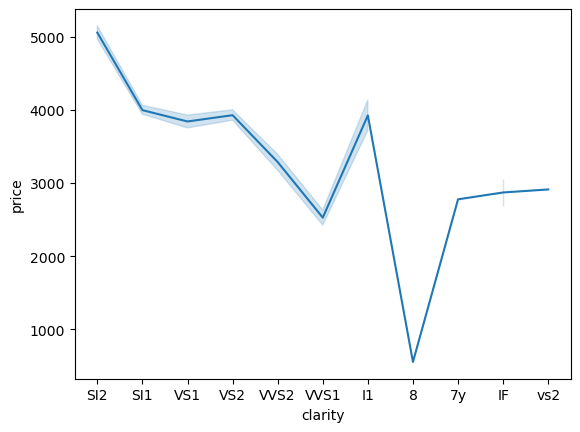

In [67]:
sns.lineplot(x='clarity',y='price',data=data) #2d

SI2 has the highest price

<Axes: xlabel='carat', ylabel='price'>

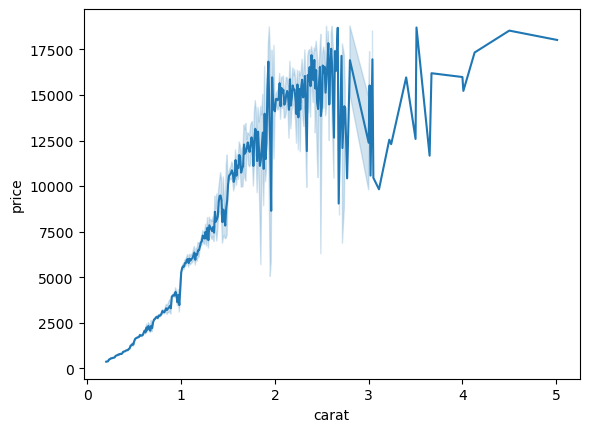

In [68]:
sns.lineplot(x='carat',y='price',data=data) #2d

carat not linear with price

In [69]:
# sns.scatterplot(x='x',y='y',hue='z',data=data)    #3d

In [70]:
data['z'].unique()

array(['2.43', '2.31', '2.63', '2.75', '2.48', '2.47', '2.53', '2.49',
       '2.39', '2.73', '2.46', '2.33', '2.71', '2.27', '2.68', '2.7',
       '2.66', '2.41', '2.62', '2.59', '2.67', '2.4', '2.42', '2.44',
       '2.37', '2.52', '2.78', '2.76', '2.61', '2.65', '2.79', '2.54',
       '2.64', '2.45', '2.72', '2.69', '2.96', '2.58', '2.51', '2.56',
       '2.55', '2.87', '3.57', '3.52', '3.5', '3.56', '3.72', '3.38',
       '3.4', '4.07', '3.66', '3.65', '3.58', '3.59', '3.63', '3.69',
       '3.61', '3.6', '3.35', '3.67', '3.62', '3.87', '3.68', '3.49',
       '3.47', '3.46', '3.7', '3.32', '3.93', '3.95', '3.64', '3.53',
       '3.37', '3.43', '3.51', '3.54', '3.48', '3.55', '3.33', '3.3',
       '4.13', '3.79', '3.24', '3.23', '4.08', '3.19', '3.94', '3.08',
       '3.31', '3.21', '3.75', '3.18', '3.41', '4.03', '4.09', '3.22',
       '4.18', '3.76', '3.83', '3.17', '3.44', '3.74', '3.8', '3.39',
       '3.88', '4.0', '3.98', '3.85', '3.96', '3.16', '3.78', '3.84',
       '4.33', 

In [71]:
mean=data['z'].mode()[0]
print(mean)
data['z']=data['z'].replace('g',float(mean))

2.7


In [72]:
data['z']=data['z'].astype('float64')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


<Axes: xlabel='count', ylabel='clarity'>

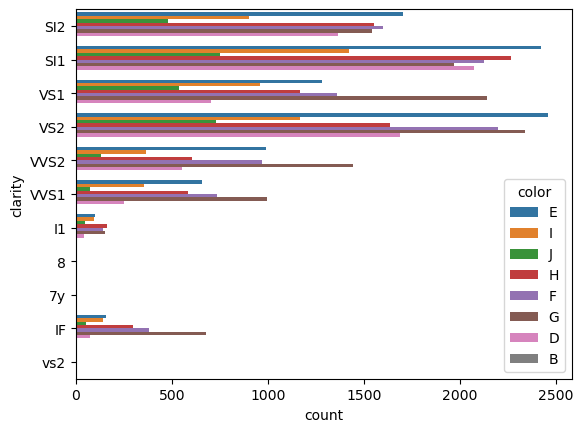

In [83]:
sns.countplot(hue='color',y='clarity',data=data)

In [84]:
data['clarity']=data['clarity'].replace('vs2','VS2')

<Axes: xlabel='count', ylabel='clarity'>

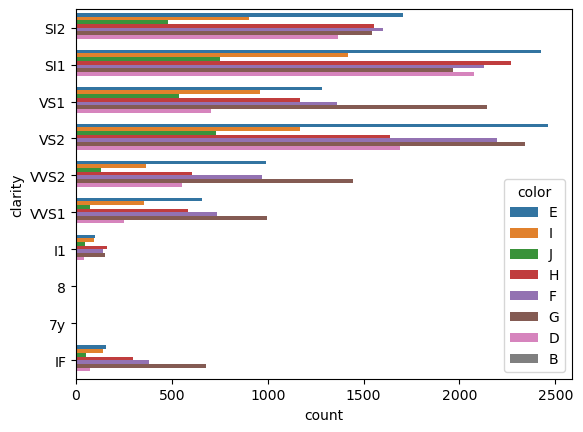

In [85]:
sns.countplot(hue='color',y='clarity',data=data)

8,7y are redundant

In [87]:
data['clarity']=data['clarity'].replace('8',data['clarity'].mode()[0])
data['clarity']=data['clarity'].replace('7y',data['clarity'].mode()[0])

<Axes: xlabel='clarity', ylabel='color'>

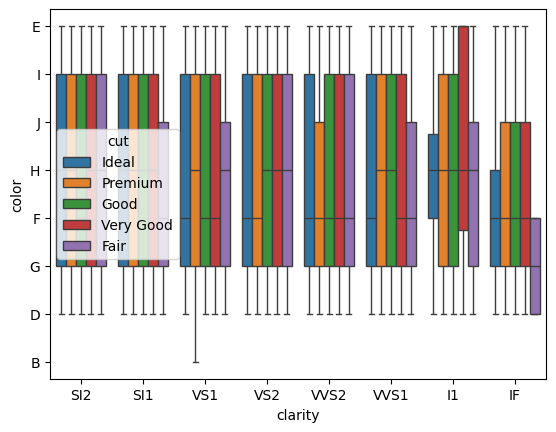

In [88]:
sns.boxplot(x='clarity',y='color',hue='cut',data=data)    #3d

SI2,VS2 have the same colors
SI1,VS1,WS1 have the same colors

<Axes: xlabel='cut', ylabel='count'>

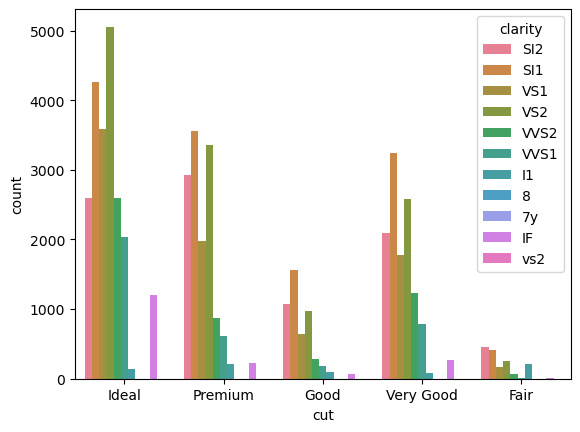

In [76]:
# sns.lineplot(x='cut',y='clarity',data=data)
sns.countplot(x='cut',hue='clarity',data=data)

VS2 ideal cut has the largest number

In [77]:
from sklearn.preprocessing import OrdinalEncoder

encoded_cut = OrdinalEncoder(categories=[['Ideal','Premium','Good','Very Good','Fair']])

data['encoded cut'] = encoded_cut.fit_transform(data[['cut']])
data


,carat,cut,color,clarity,depth,table,price,x,y,z,encoded cut
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.0
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0.0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2.0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3.0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1.0


In [78]:
from sklearn.preprocessing import LabelEncoder
encoded_color = LabelEncoder()
data['encoded_color'] = encoded_color.fit_transform(data['color'])
data

,carat,cut,color,clarity,depth,table,price,x,y,z,encoded cut,encoded_color
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.0,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.0,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1.0,6
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,0.0,1
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2.0,1
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3.0,1
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,1.0,5


# Categorical Data Encoding

label encoding: assigns a unique integer to each category,suitable for nominal data
one_hot encoding: converts categorical data into a binary format,ideal for nominal data

# why we scale data

1. Continuous numerical features with wide ranges: Features that can take on a wide range of values often benefit from scaling to prevent them from dominating other features in the model.
2. Features measured in different units: When your dataset includes features measured in different units (e.g., meters, kilograms, years), scaling helps to put them on a comparable scale.
3. Features with significantly different magnitudes: If some features have values in thousands while others are between 0 and 1, scaling can help balance their influence on the model.
4. Percentage or ratio features: While these are already on a fixed scale (typically 0–100 or 0–1), scaling might still be beneficial, especially when used alongside features with much larger ranges.